# PROCESO DE ANÁLISIS EXPLORATORIO DE DATOS DE LA PLATAFORMA DE VIDEOJUEGOS "STEAM"

In [1]:
# IMPORTACIÓN DE LIBRERIAS PARA EL PROCESO DE EDA...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats

In [2]:
# CARGA DE LOS DATASETS

reviews_data = pd.read_csv("DATASET_STEAM_LIMPIO/reviews_limpio.csv")
items_data = pd.read_csv("DATASET_STEAM_LIMPIO/items_limpio.csv")
games_data = pd.read_csv("DATASET_STEAM_LIMPIO/games_limpio.csv")

## ANÁLISIS EXPLORATORIO DE DATOS DEL DATASET "reviews_limpio.csv"

In [3]:
# ANÁLISIS DE CADA VARIABLE DE MANERA INDIVIDUAL...
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             25458 non-null  object
 1   user_url            25458 non-null  object
 2   funny               4146 non-null   object
 3   posted              25458 non-null  object
 4   last_edited         1994 non-null   object
 5   item_id             25458 non-null  int64 
 6   helpful             25458 non-null  object
 7   recommend           25458 non-null  bool  
 8   review              25446 non-null  object
 9   sentiment_analysis  25458 non-null  int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 1.8+ MB


In [4]:
# TARTAMIENTO DE DATOS DUPLICADOS DEL DATAFRAME "reviews_data"...

# Mostrar solo los datos duplicados
print("\nDatos duplicados:")
print(reviews_data[reviews_data.duplicated()])

# Mostrar las filas duplicadas
print("\nFilas duplicadas:")
print(reviews_data[reviews_data.duplicated(keep=False)])

# Contar el número total de datos duplicados
num_duplicados = reviews_data.duplicated().sum()
print(f"\nNúmero total de duplicados: {num_duplicados}")

# Eliminar datos duplicados y mostrar el DataFrame resultante
reviews_data = reviews_data.drop_duplicates()
print("\nProceso de eliminación de duplicados se realizó correctamente...")


Datos duplicados:
Empty DataFrame
Columns: [user_id, user_url, funny, posted, last_edited, item_id, helpful, recommend, review, sentiment_analysis]
Index: []

Filas duplicadas:
Empty DataFrame
Columns: [user_id, user_url, funny, posted, last_edited, item_id, helpful, recommend, review, sentiment_analysis]
Index: []

Número total de duplicados: 0

Proceso de eliminación de duplicados se realizó correctamente...


In [5]:
# TRATAMIENTO DE LOS VALORES NULOS...

# Mostrar la cantidad de nulos en cada columna
nulos_por_columna = reviews_data.isnull().sum()

# Imprimir los resultados
print("Cantidad de nulos por columna:")

nulos_por_columna

Cantidad de nulos por columna:


user_id                   0
user_url                  0
funny                 21312
posted                    0
last_edited           23464
item_id                   0
helpful                   0
recommend                 0
review                   12
sentiment_analysis        0
dtype: int64

In [6]:
# Reemplazar valores nulos con "0" para columnas numéricas
numeric_columns = reviews_data.select_dtypes(include='number').columns
reviews_data[numeric_columns] = reviews_data[numeric_columns].fillna(0)

# Reemplazar valores nulos con "SD" para columnas de tipo string
string_columns = reviews_data.select_dtypes(include='object').columns
reviews_data[string_columns] = reviews_data[string_columns].fillna("SD")

print("EL PROCESO DE TRATAMIENTO DE VALORES NULOS SE EJECUTÓ CON ÉXITO...")

EL PROCESO DE TRATAMIENTO DE VALORES NULOS SE EJECUTÓ CON ÉXITO...


### ANÁLISIS DE LOS DATOS DE LA COLUMNA "posted"...

In [7]:
# Crear un nuevo DataFrame solo con la columna "posted"
reviews_data_posted = pd.DataFrame(reviews_data['posted'])

In [8]:
# Copiar la columna "posted" para mantener el formato original
reviews_data_posted['formatted_posted'] = reviews_data_posted['posted']

# Asegúrate de que la columna "posted" esté en formato de fecha y hora
reviews_data_posted['posted'] = pd.to_datetime(reviews_data_posted['posted'], format='Posted %B %d, %Y.', errors='coerce')

# Extraer el año y crear una nueva columna llamada "year"
reviews_data_posted['year'] = reviews_data_posted['posted'].dt.year

# Mostrar el DataFrame con la nueva columna "year" y "formatted_posted"
print(reviews_data_posted[['formatted_posted', 'posted', 'year']])

               formatted_posted     posted    year
0      Posted November 5, 2011. 2011-11-05  2011.0
1         Posted June 24, 2014. 2014-06-24  2014.0
2            Posted February 3.        NaT     NaN
3      Posted October 14, 2013. 2013-10-14  2013.0
4        Posted April 15, 2014. 2014-04-15  2014.0
...                         ...        ...     ...
25453            Posted May 31.        NaT     NaN
25454           Posted June 17.        NaT     NaN
25455           Posted June 23.        NaT     NaN
25456           Posted July 21.        NaT     NaN
25457            Posted July 3.        NaT     NaN

[25458 rows x 3 columns]


In [9]:
# Contar la cantidad de NaT en la columna "posted"
cantidad_nan = reviews_data_posted['posted'].isna().sum()

# Mostrar la cantidad de NaT
print(f"Cantidad de NaT en la columna 'posted': {cantidad_nan}")

Cantidad de NaT en la columna 'posted': 4634


In [10]:
# Eliminar filas con valores NaT en la columna "posted"
reviews_data_posted = reviews_data_posted.dropna(subset=['posted'])

In [11]:
# Asegurarse de que la columna "year" esté en formato numérico antes de la conversión
reviews_data_posted['year'] = pd.to_numeric(reviews_data_posted['year'], errors='coerce')

# Cambiar el tipo de datos de la columna "year" a int64
reviews_data_posted['year'] = reviews_data_posted['year'].astype('int64')

In [12]:
reviews_data_posted

,posted,formatted_posted,year
0,2011-11-05,"Posted November 5, 2011.",2011
1,2014-06-24,"Posted June 24, 2014.",2014
3,2013-10-14,"Posted October 14, 2013.",2013
4,2014-04-15,"Posted April 15, 2014.",2014
5,2014-05-05,"Posted May 5, 2014.",2014
...,...,...,...
25423,2015-10-14,"Posted October 14, 2015.",2015
25424,2015-10-10,"Posted October 10, 2015.",2015
25428,2015-10-31,"Posted October 31, 2015.",2015
25430,2015-12-14,"Posted December 14, 2015.",2015


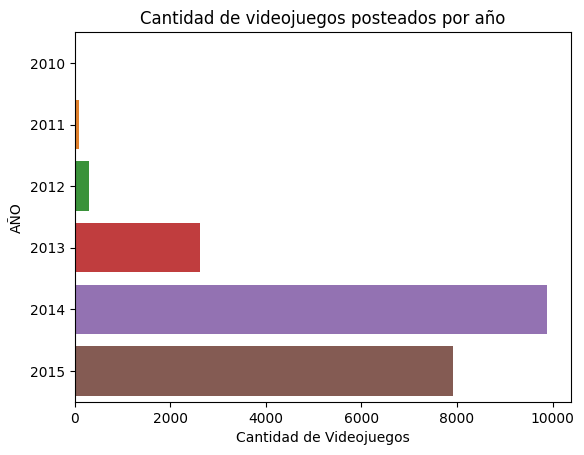

In [13]:
# GRÁFICA DE LOS VALORES DE LA COLUMNA "posted"...

#Contaré el número de videojuego lanzados por año
counts= reviews_data_posted['year'].value_counts()

#Grafico los datos con seaborn
ax= sns.countplot(y='year', data= reviews_data_posted)

#Agrego el titulo al eje y
ax.set_ylabel('AÑO')

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo del grafico
ax.set_title('Cantidad de videojuegos posteados por año')

# Muestro el grafico
plt.show()

In [14]:
# Contar la cantidad de veces que se repiten los valores únicos en 'recommend'
conteo_valores = reviews_data_posted['year'].value_counts()

# Mostrar el resultado
print("Conteo de valores únicos:")
print(conteo_valores)

Conteo de valores únicos:
year
2014    9881
2015    7909
2013    2632
2012     299
2011      97
2010       6
Name: count, dtype: int64


### ANÁLISIS DE LOS DATOS DE LA COLUMNA "last_edited"...

In [15]:
# Crear un nuevo DataFrame solo con la columna "last_edited"
reviews_data_last_edited = pd.DataFrame(reviews_data['last_edited'])

In [16]:
# Copiar la columna "posted" para mantener el formato original
reviews_data_last_edited['formatted_posted'] = reviews_data_last_edited['last_edited']

# Asegúrate de que la columna "posted" esté en formato de fecha y hora
reviews_data_last_edited['last_edited'] = pd.to_datetime(reviews_data_last_edited['last_edited'], format='Last edited %B %d, %Y.', errors='coerce')

# Extraer el año y crear una nueva columna llamada "year"
reviews_data_last_edited['year'] = reviews_data_last_edited['last_edited'].dt.year

# Mostrar el DataFrame con la nueva columna "year" y "formatted_posted"
print(reviews_data_last_edited[['formatted_posted', 'last_edited', 'year']])

      formatted_posted last_edited  year
0                   SD         NaT   NaN
1                   SD         NaT   NaN
2                   SD         NaT   NaN
3                   SD         NaT   NaN
4                   SD         NaT   NaN
...                ...         ...   ...
25453               SD         NaT   NaN
25454               SD         NaT   NaN
25455               SD         NaT   NaN
25456               SD         NaT   NaN
25457               SD         NaT   NaN

[25458 rows x 3 columns]


In [17]:
# Eliminar filas con valores NaT en la columna "last_edited"
reviews_data_last_edited = reviews_data_last_edited.dropna(subset=['last_edited'])

In [18]:
# Asegurarse de que la columna "year" esté en formato numérico antes de la conversión
reviews_data_last_edited['year'] = pd.to_numeric(reviews_data_last_edited['year'], errors='coerce')

# Cambiar el tipo de datos de la columna "year" a int64
reviews_data_last_edited['year'] = reviews_data_last_edited['year'].astype('int64')

In [19]:
reviews_data_last_edited

,last_edited,formatted_posted,year
18,2014-12-28,"Last edited December 28, 2014.",2014
48,2015-11-27,"Last edited November 27, 2015.",2015
63,2014-06-24,"Last edited June 24, 2014.",2014
104,2015-03-19,"Last edited March 19, 2015.",2015
121,2015-11-08,"Last edited November 8, 2015.",2015
...,...,...,...
25310,2014-12-20,"Last edited December 20, 2014.",2014
25329,2015-04-05,"Last edited April 5, 2015.",2015
25338,2015-01-16,"Last edited January 16, 2015.",2015
25387,2015-02-07,"Last edited February 7, 2015.",2015


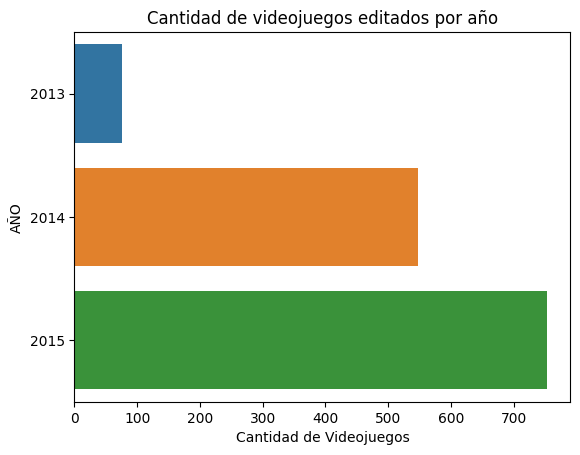

In [20]:
# GRÁFICA DE LOS VALORES DE LA COLUMNA "last_edited"...

#Contaré el número de videojuego lanzados por año
counts= reviews_data_last_edited['year'].value_counts()

#Grafico los datos con seaborn
ax= sns.countplot(y='year', data= reviews_data_last_edited)

#Agrego el titulo al eje y
ax.set_ylabel('AÑO')

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo del grafico
ax.set_title('Cantidad de videojuegos editados por año')

# Muestro el grafico
plt.show()

In [21]:
# Contar la cantidad de veces que se repiten los valores únicos en 'last_edited'
conteo_valores = reviews_data_last_edited['year'].value_counts()

# Mostrar el resultado
print("Conteo de valores únicos:")
print(conteo_valores)

Conteo de valores únicos:
year
2015    753
2014    547
2013     76
Name: count, dtype: int64


### ANÁLISIS DE LOS DATOS DE LA COLUMNA "recommend"...

In [22]:
# Crear un nuevo DataFrame solo con la columna "posted"
reviews_data_recommend = pd.DataFrame(reviews_data['recommend'])

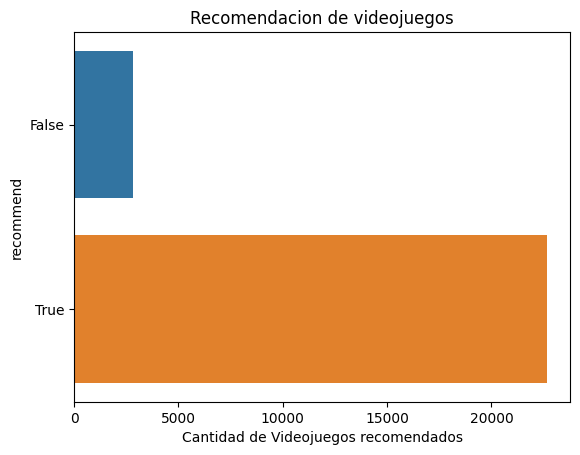

In [23]:
# GRÁFICA DE LOS VALORES DE LA COLUMNA "recommend"...

#Contaré el número de videojuego lanzados por año
counts= reviews_data_recommend['recommend'].value_counts()

#Grafico los datos con seaborn
ax= sns.countplot(y='recommend', data= reviews_data_recommend)

#Agrego el titulo al eje y
ax.set_ylabel('recommend')

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos recomendados')

#Agrego el titulo del grafico
ax.set_title('Recomendacion de videojuegos')

# Muestro el grafico
plt.show()

In [24]:
# Contar la cantidad de veces que se repiten los valores únicos en 'recommend'
conteo_valores = reviews_data_recommend['recommend'].value_counts()

# Mostrar el resultado
print("Conteo de valores únicos:")
print(conteo_valores)

Conteo de valores únicos:
recommend
True     22643
False     2815
Name: count, dtype: int64


### ANÁLISIS DE LOS DATOS DE LA COLUMNA "sentiment_analysis"...

In [25]:
# Crear un nuevo DataFrame solo con la columna "sentiment_analysis"
reviews_data_sentiment_analysis = pd.DataFrame(reviews_data['sentiment_analysis'])

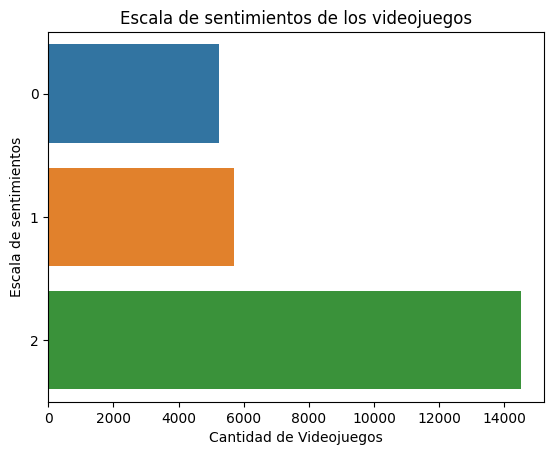

In [26]:
# GRÁFICA DE LOS VALORES DE LA COLUMNA "sentiment_analysis"...

#Contaré los valores que existen en la columna sentiment_analysis
counts= reviews_data_sentiment_analysis['sentiment_analysis'].value_counts()

#Grafico los datos con seaborn
ax= sns.countplot(y='sentiment_analysis', data= reviews_data_sentiment_analysis)

#Agrego el titulo al eje y
ax.set_ylabel('Escala de sentimientos')

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo del grafico
ax.set_title('Escala de sentimientos de los videojuegos')

# Muestro el grafico
plt.show()

In [27]:
# Contar la cantidad de veces que se repiten los valores únicos en 'recommend'
conteo_valores = reviews_data_sentiment_analysis['sentiment_analysis'].value_counts()

# Mostrar el resultado
print("Conteo de valores únicos:")
print(conteo_valores)

Conteo de valores únicos:
sentiment_analysis
2    14496
1     5713
0     5249
Name: count, dtype: int64


## ANÁLISIS EXPLORATORIO DE DATOS DEL DATASET "items_limpio.csv"

In [28]:
# ANÁLISIS DE CADA VARIABLE DE MANERA INDIVIDUAL...

items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87632 entries, 0 to 87631
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           87632 non-null  object 
 1   items_count       87632 non-null  int64  
 2   steam_id          87632 non-null  int64  
 3   user_url          87632 non-null  object 
 4   item_id           70918 non-null  float64
 5   item_name         70918 non-null  object 
 6   playtime_forever  70918 non-null  float64
 7   playtime_2weeks   70918 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.3+ MB


In [29]:
# TARTAMIENTO DE DATOS DUPLICADOS DEL DATAFRAME "items_data"...

# Mostrar solo los datos duplicados
print("\nDatos duplicados:")
print(items_data[items_data.duplicated()])

# Mostrar las filas duplicadas
print("\nFilas duplicadas:")
print(items_data[items_data.duplicated(keep=False)])

# Contar el número total de datos duplicados
num_duplicados = items_data.duplicated().sum()
print(f"\nNúmero total de duplicados: {num_duplicados}")

# Eliminar datos duplicados y mostrar el DataFrame resultante
items_data = items_data.drop_duplicates()
print("\nProceso de eliminación de duplicados se realizó correctamente...")


Datos duplicados:
Empty DataFrame
Columns: [user_id, items_count, steam_id, user_url, item_id, item_name, playtime_forever, playtime_2weeks]
Index: []

Filas duplicadas:
Empty DataFrame
Columns: [user_id, items_count, steam_id, user_url, item_id, item_name, playtime_forever, playtime_2weeks]
Index: []

Número total de duplicados: 0

Proceso de eliminación de duplicados se realizó correctamente...


In [30]:
# TRATAMIENTO DE LOS VALORES NULOS...

# Mostrar la cantidad de nulos en cada columna
nulos_por_columna = items_data.isnull().sum()

# Imprimir los resultados
print("Cantidad de nulos por columna:")

nulos_por_columna

Cantidad de nulos por columna:


user_id                 0
items_count             0
steam_id                0
user_url                0
item_id             16714
item_name           16714
playtime_forever    16714
playtime_2weeks     16714
dtype: int64

In [31]:
# Reemplazar valores nulos con "0" para columnas numéricas
numeric_columns = items_data.select_dtypes(include='number').columns
items_data[numeric_columns] = items_data[numeric_columns].fillna(0)

# Reemplazar valores nulos con "SD" para columnas de tipo string
string_columns = items_data.select_dtypes(include='object').columns
items_data[string_columns] = items_data[string_columns].fillna("SD")

print("EL PROCESO DE TRATAMIENTO DE VALORES NULOS SE EJECUTÓ CON ÉXITO...")

EL PROCESO DE TRATAMIENTO DE VALORES NULOS SE EJECUTÓ CON ÉXITO...


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "items_count"...

In [32]:
# Crear un nuevo DataFrame solo con la columna "user_id"
items_data_items_count = pd.DataFrame(items_data['items_count'])

Text(0.5, 1.0, ' Distribucion de items_count en los Videojuegos')

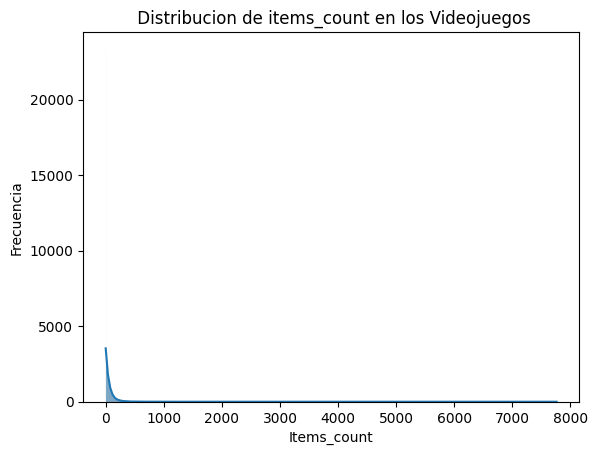

In [33]:
# GRAFICA DEL HISTOGRAMA SEGÚN DATOS DE LA COLUMNA "items_count"

#Utilizare seaborn para realizar un histogram
sns.histplot(items_data_items_count, x='items_count', kde=True)

#Colocaré el título del eje x
plt.xlabel('Items_count')

#Colocaré el título del eje y
plt.ylabel('Frecuencia')

#Colaré el título del gráfico
plt.title (' Distribucion de items_count en los Videojuegos')

In [34]:
# Conteo de los valores de la columna "items_id"
conteo_valores = items_data_items_count['items_count'].value_counts()

# Filtrar los valores que se repiten más de una vez
repiten_mas_de_una_vez = conteo_valores[conteo_valores > 1000]

# Mostrar el resultado
print("Conteo de valores de 'items_count' que se repiten más de una vez:")
print(repiten_mas_de_una_vez)

Conteo de valores de 'items_count' que se repiten más de una vez:
items_count
0    16714
1     3303
2     1772
3     1519
4     1382
5     1201
6     1154
7     1130
8     1116
9     1002
Name: count, dtype: int64


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "steam_id"...

In [35]:
# Crear un nuevo DataFrame solo con la columna "user_id"
items_data_steam_id = pd.DataFrame(items_data['steam_id'])

Text(0.5, 1.0, ' Distribucion de steam_id en los Videojuegos')

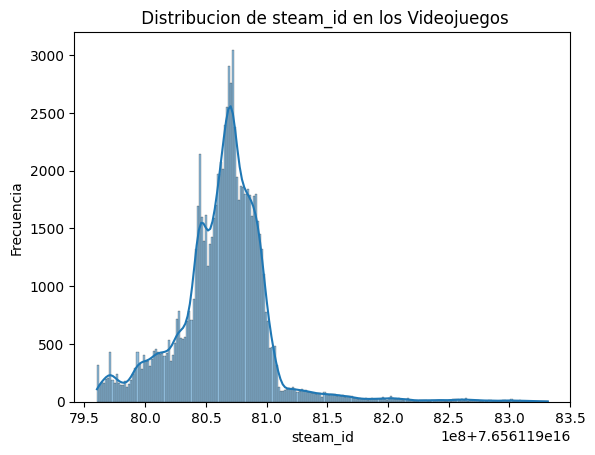

In [36]:
# GRAFICA DEL HISTOGRAMA SEGÚN DATOS DE LA COLUMNA "steam_id"...

#Utilizare seaborn para realizar un histogram
sns.histplot(items_data_steam_id, x='steam_id', kde=True)

#Colocaré el título del eje x
plt.xlabel('steam_id')

#Colocaré el título del eje y
plt.ylabel('Frecuencia')

#Colaré el título del gráfico
plt.title (' Distribucion de steam_id en los Videojuegos')

### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "playtime_forever"...

In [37]:
# Crear un nuevo DataFrame solo con la columna "user_id"
items_data_playtime_forever = pd.DataFrame(items_data['playtime_forever'])

In [38]:
items_data_playtime_forever.describe()

,playtime_forever
count,87632.000000
mean,2909.611375
std,10914.375991
min,0.000000
25%,0.000000
50%,132.000000
75%,1278.250000
max,388621.000000


In [39]:
# Calcular la media
media = np.mean(items_data_playtime_forever['playtime_forever'])

# Calcular la mediana
mediana = np.median(items_data_playtime_forever['playtime_forever'])

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 2909.611374840241
Mediana: 132.0


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "playtime_2weeks"...

In [40]:
# Crear un nuevo DataFrame solo con la columna "user_id"
items_data_playtime_2weeks = pd.DataFrame(items_data['playtime_2weeks'])

In [41]:
items_data_playtime_2weeks.describe()

,playtime_2weeks
count,87632.000000
mean,12.031062
std,170.145412
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14201.000000


In [42]:
# Calcular la media
media = np.mean(items_data_playtime_forever['playtime_forever'])

# Calcular la mediana
mediana = np.median(items_data_playtime_forever['playtime_forever'])

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 2909.611374840241
Mediana: 132.0


## ANÁLISIS EXPLORATORIO DE DATOS DEL DATASET "games_limpio.csv"

In [43]:
# ANÁLISIS DE CADA VARIABLE DE MANERA INDIVIDUAL...

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74837 entries, 0 to 74836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     59196 non-null  object 
 1   genres        71554 non-null  object 
 2   app_name      74834 non-null  object 
 3   title         72786 non-null  object 
 4   url           74837 non-null  object 
 5   release_date  72735 non-null  object 
 6   tags          74652 non-null  object 
 7   reviews_url   74834 non-null  object 
 8   price         71491 non-null  object 
 9   early_access  74837 non-null  bool   
 10  id            74834 non-null  float64
 11  developer     71358 non-null  object 
dtypes: bool(1), float64(1), object(10)
memory usage: 6.4+ MB


In [44]:
# TARTAMIENTO DE DATOS DUPLICADOS DEL DATAFRAME "games_data"...

# Mostrar solo los datos duplicados
print("\nDatos duplicados:")
print(games_data[games_data.duplicated()])

# Mostrar las filas duplicadas
print("\nFilas duplicadas:")
print(games_data[games_data.duplicated(keep=False)])

# Contar el número total de datos duplicados
num_duplicados = games_data.duplicated().sum()
print(f"\nNúmero total de duplicados: {num_duplicados}")

# Eliminar datos duplicados y mostrar el DataFrame resultante
games_data = games_data.drop_duplicates()
print("\nProceso de eliminación de duplicados se realizó correctamente...")


Datos duplicados:
Empty DataFrame
Columns: [publisher, genres, app_name, title, url, release_date, tags, reviews_url, price, early_access, id, developer]
Index: []

Filas duplicadas:
Empty DataFrame
Columns: [publisher, genres, app_name, title, url, release_date, tags, reviews_url, price, early_access, id, developer]
Index: []

Número total de duplicados: 0

Proceso de eliminación de duplicados se realizó correctamente...


In [45]:
# TRATAMIENTO DE LOS VALORES NULOS...

# Mostrar la cantidad de nulos en cada columna
nulos_por_columna = games_data.isnull().sum()

# Imprimir los resultados
print("Cantidad de nulos por columna:")

nulos_por_columna

Cantidad de nulos por columna:


publisher       15641
genres           3283
app_name            3
title            2051
url                 0
release_date     2102
tags              185
reviews_url         3
price            3346
early_access        0
id                  3
developer        3479
dtype: int64

In [46]:
# Reemplazar valores nulos con "0" para columnas numéricas
numeric_columns = games_data.select_dtypes(include='number').columns
games_data[numeric_columns] = games_data[numeric_columns].fillna(0)

# Reemplazar valores nulos con "SD" para columnas de tipo string
string_columns = games_data.select_dtypes(include='object').columns
games_data[string_columns] = games_data[string_columns].fillna("SD")

print("EL PROCESO DE TRATAMIENTO DE VALORES NULOS SE EJECUTÓ CON ÉXITO...")

EL PROCESO DE TRATAMIENTO DE VALORES NULOS SE EJECUTÓ CON ÉXITO...


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "genres"...

In [47]:
# Crear un nuevo DataFrame solo con la columna "genres"
games_data_genres = pd.DataFrame(games_data['genres'])

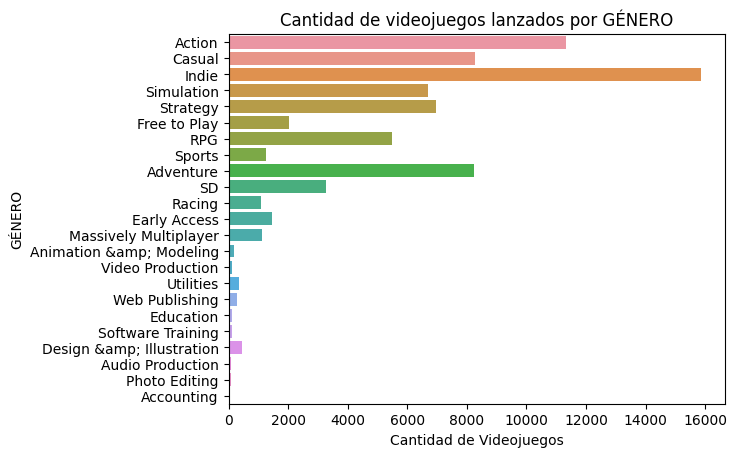

In [48]:
#Contaré el número de videojuego lanzados por género
counts= games_data_genres['genres'].value_counts()

#Grafico los datos con seaborn
ax= sns.countplot(y='genres', data= games_data_genres)

#Agrego el titulo al eje y
ax.set_ylabel('GÉNERO')

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo del grafico
ax.set_title('Cantidad de videojuegos lanzados por GÉNERO')

# Muestro el grafico
plt.show()

In [49]:
# Contar la cantidad de veces que se repiten los valores únicos en 'recommend'
conteo_valores = games_data_genres['genres'].value_counts()

# Mostrar el resultado
print("Conteo de valores únicos:")
print(conteo_valores)

Conteo de valores únicos:
genres
Indie                        15858
Action                       11321
Casual                        8282
Adventure                     8243
Strategy                      6957
Simulation                    6699
RPG                           5479
SD                            3283
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "app_name"...

In [50]:
# Crear un nuevo DataFrame solo con la columna "app_name"
games_data_app_name = pd.DataFrame(games_data['app_name'])

In [51]:
# Conteo de los valores de la columna "app_name"
conteo_valores = games_data_app_name['app_name'].value_counts()

# Filtrar los valores que se repiten más de una vez
repiten_mas_de_una_vez = conteo_valores[conteo_valores > 8]

# Mostrar el resultado
print("Conteo de valores de 'app_name' que se repiten más de una vez:")
print(repiten_mas_de_una_vez)

Conteo de valores de 'app_name' que se repiten más de una vez:
app_name
AutoTileSet                                           11
Multiplicity                                          10
Assault Corps 2                                       10
Rebons                                                10
GAME TUBE ♛                                            9
Road Dogs                                              9
Marble Mayhem: Fragile Ball                            9
Custom Town                                            9
ARM PLANETARY PROSPECTORS Asteroid Resource Mining     9
Name: count, dtype: int64


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "release_date"...

In [52]:
# Crear un nuevo DataFrame solo con la columna "app_name"
games_data_release_date = pd.DataFrame(games_data['release_date'])

In [53]:
# Contar los valores nulos en la columna especificada
cantidad_valores_nulos = games_data_release_date['release_date'].isnull().sum()

print(f"La cantidad de valores nulos en la columna 'release_date' es: {cantidad_valores_nulos}")

La cantidad de valores nulos en la columna 'release_date' es: 0


In [54]:
# Eliminar las filas con valores nulos en la columna 'RELEASE_DATE'
games_data_release_date = games_data_release_date.dropna(subset=['release_date'])

In [55]:
# Trata de convertir la columna 'release_date' a tipo datetime, maneja los errores asignando NaN en caso de falla
games_data_release_date['release_date'] = pd.to_datetime(games_data_release_date['release_date'], errors='coerce')

# Extraer el año y colocarlo en una nueva columna 'año'
games_data_release_date['año'] = games_data_release_date['release_date'].dt.year

# Convertir la columna 'año' a tipo entero, tratando los valores nulos
games_data_release_date['año'] = games_data_release_date['año'].astype('Int64')

In [56]:
# Eliminar las filas con valores nulos en la columna 'RELEASE_DATE'
games_data_release_date = games_data_release_date.dropna(subset=['año'])

In [57]:
# Enmarcar los valores de la columna "año"
games_data_release_date = games_data_release_date[games_data_release_date['año'] >= 2003]

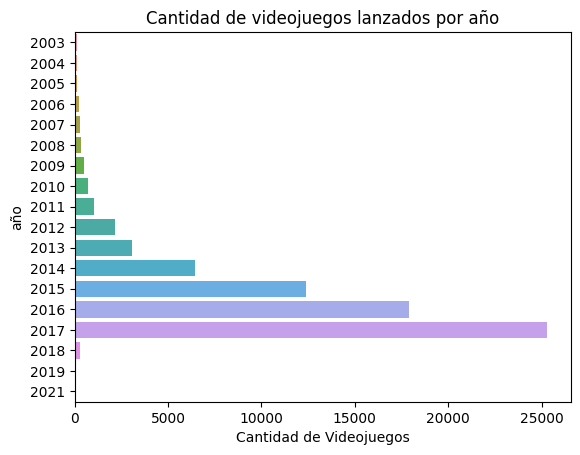

In [58]:
#Contaré el número de videojuego lanzados por género
counts= games_data_release_date['año'].value_counts()

#Grafico los datos con seaborn
ax= sns.countplot(y='año', data= games_data_release_date)

#Agrego el titulo al eje y
ax.set_ylabel('año')

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo del grafico
ax.set_title('Cantidad de videojuegos lanzados por año')

# Muestro el grafico
plt.show()

In [59]:
# Contar la cantidad de veces que se repiten los valores únicos en 'recommend'
conteo_valores = games_data_release_date['año'].value_counts()

# Mostrar el resultado
print("Conteo de valores únicos:")
print(conteo_valores)

Conteo de valores únicos:
año
2017    25278
2016    17909
2015    12407
2014     6445
2013     3090
2012     2162
2011     1034
2010      696
2009      507
2008      351
2018      316
2007      277
2006      230
2005      149
2003      128
2004      107
2019       10
2021        3
Name: count, dtype: Int64


### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "publisher"...

In [60]:
# Crear un nuevo DataFrame solo con la columna "app_name"
games_data_publisher = pd.DataFrame(games_data['publisher'])

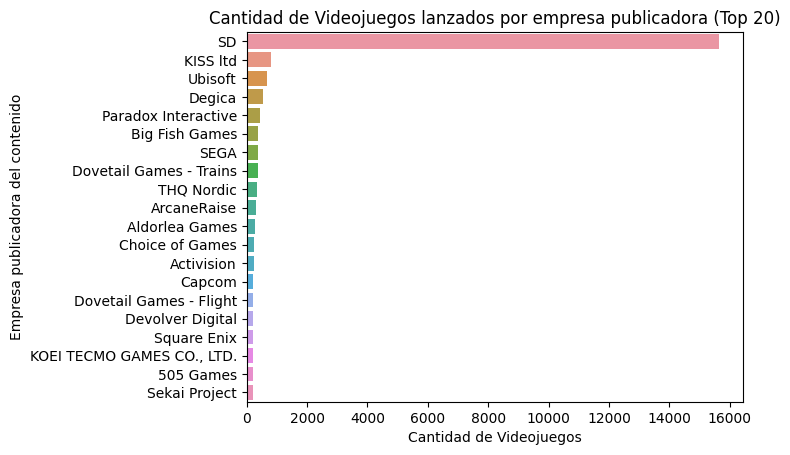

In [61]:
#Contaré el número de videojuego lanzados por año
counts= games_data_publisher['publisher'].value_counts()

#Cuento los videojuegos publicados por empresa y eligo los 15 con mayor cantidad
top_publishers = counts.nlargest(20)

#Grafico los datos con seaborn 
ax = sns.countplot(y='publisher', data= games_data_publisher, order=top_publishers.index)

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo al eje y
ax.set_ylabel('Empresa publicadora del contenido')

#Agrego el titulo del grafico
ax.set_title('Cantidad de Videojuegos lanzados por empresa publicadora (Top 20)')

# Muestro el grafico
plt.show()

### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "developer"...

In [62]:
# Crear un nuevo DataFrame solo con la columna "developer"
games_data_developer = pd.DataFrame(games_data['developer'])

Text(0.5, 1.0, 'Cantidad de videojuegos lanzados por Desarrollador')

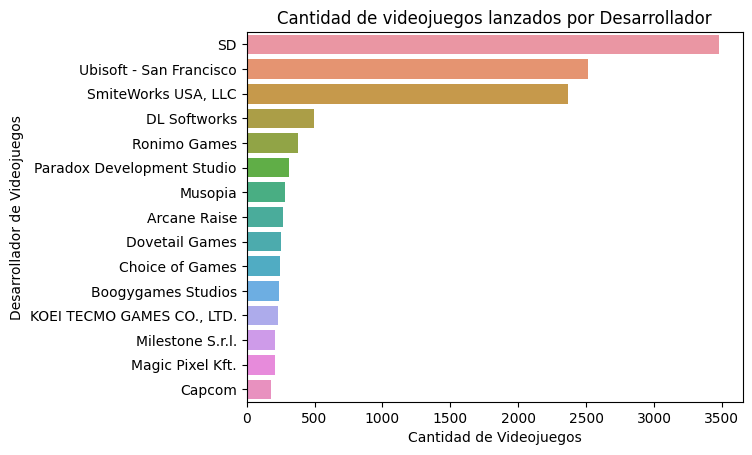

In [63]:
#Contaré el número de videojuego lanzados por año
counts= games_data_developer['developer'].value_counts()

#Cuento los videojuegos publicados por genero y eligo los 15 generos con mayor cantidad
top_developer = counts.nlargest(15)

#Grafico los datos con seaborn 
ax = sns.countplot(y='developer', data= games_data_developer, order=top_developer.index)

#Agrego el titulo al eje x
ax.set_xlabel('Cantidad de Videojuegos')

#Agrego el titulo al eje y
ax.set_ylabel('Desarrollador de Videojuegos')

#Agrego el titulo del grafico
ax.set_title('Cantidad de videojuegos lanzados por Desarrollador')

### ANÁLISIS EXPLORATORIO DE LOS DATOS DE LA COLUMNA "price"...

In [64]:
# Crear un nuevo DataFrame solo con la columna "developer"
games_data_price = pd.DataFrame(games_data['price'])

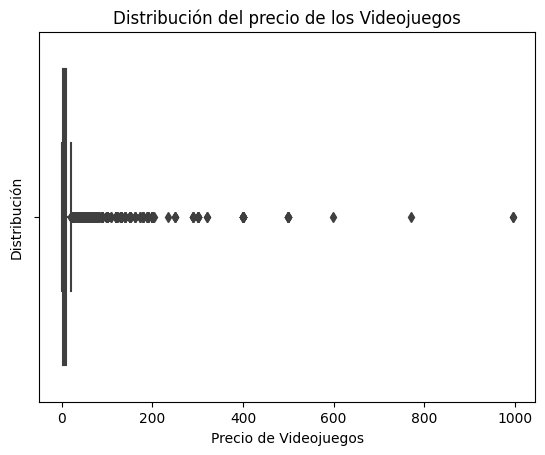

In [65]:
# Convierte la columna de precios a tipo numérico
games_data_price['price'] = pd.to_numeric(games_data_price['price'], errors='coerce')

# Crea el diagrama de caja con seaborn
sns.boxplot(x=games_data_price['price'])

# Coloca título al eje x
plt.xlabel('Precio de Videojuegos')

# Coloca título al eje y
plt.ylabel('Distribución')

# Coloca título al gráfico
plt.title('Distribución del precio de los Videojuegos')

# Muestra el gráfico
plt.show()
